<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>Time Series</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Tendencia:</strong>
la tendencia muestra la tendencia de los datos a aumentar o disminuir durante un largo período de tiempo y filtra las variaciones estacionales.<BR><BR>
<strong>Estacionalidad:</strong> La
estacionalidad son las variaciones que ocurren durante un período corto de tiempo y no es lo suficientemente prominente como para ser llamada «tendencia».
</p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>y(t) = g(t) + s(t) + h(t) + e(t)</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>g(t)</strong> se refiere a la tendencia(cambios durante un largo período de tiempo)<BR>
<strong>s(t)</strong> se refiere a la estacionalidad(cambios periódicos o de corto plazo)<BR>
<strong>h(t)</strong> se refiere a los efectos de las vacaciones en el pronóstico<BR>
<strong>e(t)</strong> se refiere a los cambios incondicionales que son específicos<BR>
<strong>y(t)</strong> es el pronóstico.</p>     

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://ichi.pro/es/analisis-de-series-de-tiempo-con-facebook-prophet-como-funciona-y-como-usarlo-265389504990778/" target=\"_blank\">Análisis de series de tiempo</a>
</strong></p>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://facebook.github.io/prophet/docs/quick_start.html" target=\"_blank\">FBProphet Help</a>
</strong></p>


In [1]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

In [3]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.0.5


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    869 non-null    object
 1   cases   869 non-null    int64 
 2   deaths  869 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


In [6]:
df.sample(5)

,date,cases,deaths
364,2021-01-19,24314933,401836
708,2021-12-29,53657745,821731
814,2022-04-14,80466106,986448
755,2022-02-14,77835449,920954
54,2020-03-15,3600,68


In [7]:
df['new_cases'] = df.cases - df.cases.shift().fillna(0)

In [8]:
df.head()

,date,cases,deaths,new_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0


In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.head()

,date,cases,deaths,new_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0


In [11]:
df.set_index('date',inplace=True)

In [12]:
df.head()

,cases,deaths,new_cases
date,,,
2020-01-21,1,0,1.0
2020-01-22,1,0,0.0
2020-01-23,1,0,0.0
2020-01-24,2,0,1.0
2020-01-25,3,0,1.0


In [13]:
df['rolling_weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)

In [14]:
df.head()

,cases,deaths,new_cases,rolling_weekly_avg
date,,,,
2020-01-21,1,0,1.0,0.0
2020-01-22,1,0,0.0,0.0
2020-01-23,1,0,0.0,0.0
2020-01-24,2,0,1.0,0.0
2020-01-25,3,0,1.0,0.0


<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Configuración para fbprophet</strong></p> 

In [15]:
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})

In [16]:
ts.head()

,ds,y
date,,
2020-01-21,2020-01-21,1.0
2020-01-22,2020-01-22,0.0
2020-01-23,2020-01-23,0.0
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,1.0


In [17]:
from prophet import Prophet

In [18]:
prophet = Prophet()

In [19]:
prophet.fit(ts);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>El pronóstico contendrá una predicción para cada valor histórico presente en el conjunto de datos más pronósticos adicionales para el número de períodos pasados por el método (25)</strong></p> 

In [20]:
future = prophet.make_future_dataframe(periods=25)

In [22]:
future.head()

,ds
0,2020-01-21
1,2020-01-22
2,2020-01-23
3,2020-01-24
4,2020-01-25


<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Hacer la estimación</strong></p> 

In [23]:
forecast = prophet.predict(future)

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>ds contiene la entrada de la marca de tiempo del pronóstico<br>
yhat contiene el valor previsto de la serie temporal<br>
yhat_lower contiene la parte inferior del intervalo de confianza para el pronóstico<br>
yhat_upper contiene la parte inferior del intervalo de confianza para el pronóstico<br></strong></p> 

In [24]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,272999.055,155911.483,386702.425
1,2020-01-22,262315.331,150433.348,383220.556
2,2020-01-23,239947.196,139924.355,345561.763
3,2020-01-24,227490.699,103902.350,339093.011
4,2020-01-25,161029.864,45944.548,275669.381


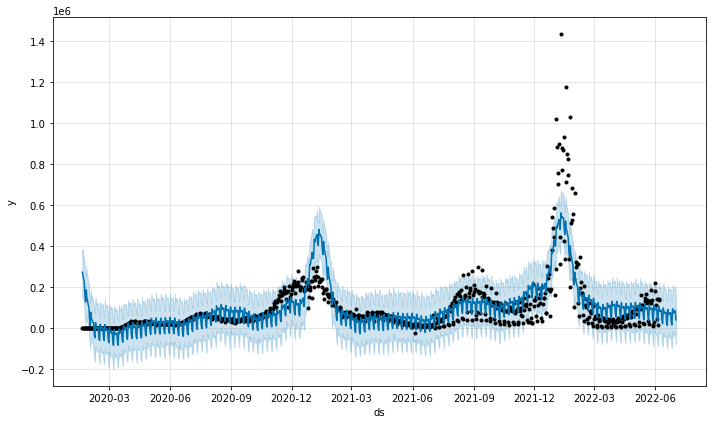

In [25]:
fig = prophet.plot(forecast)

In [26]:
from fbprophet.plot import add_changepoints_to_plot

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Cambio de Tendencia</strong></p> 
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Prophet detecta los puntos de cambio especificando primero un gran número de puntos de cambio potenciales</strong></p> 

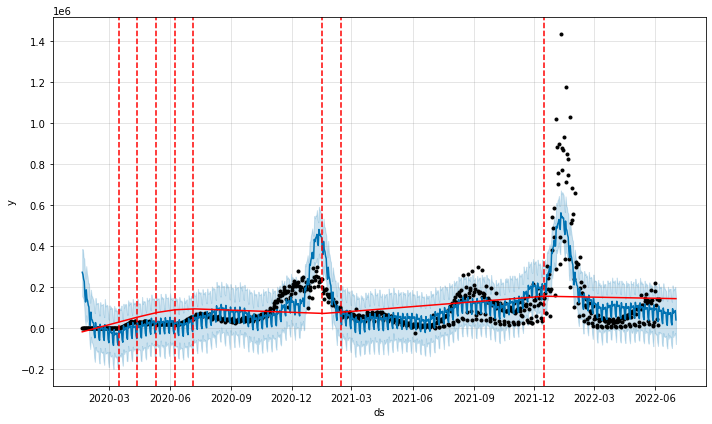

In [27]:
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Prophet detecto una estacionalidad semanal de los nuevos casos notificados y una tendencia general al alza. También agregó puntos de cambio durante el verano y el otoño para modelar mejor el gran aumento en la tasa de nuevos casos</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Prophet no pudo incorporar la recesión en los nuevos casos de COVID después del nuevo año. Establecer el changepoint_range = 1.
</strong></p>     

In [28]:
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)

In [29]:
prophet.fit(ts);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = prophet.make_future_dataframe(periods=25)

In [31]:
forecast = prophet.predict(future)

In [32]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,89399.960,10523.742,174994.774
1,2020-01-22,78414.104,-2457.816,168126.682
2,2020-01-23,67101.337,-22043.814,148073.819
3,2020-01-24,55648.514,-27553.112,145421.650
4,2020-01-25,44238.915,-35303.652,125973.299


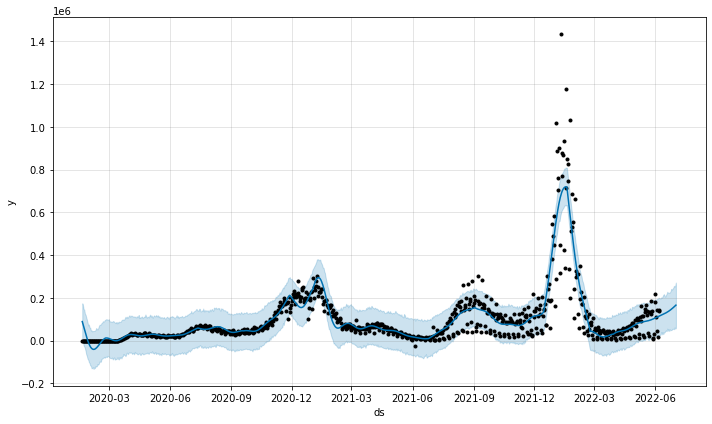

In [33]:
fig = prophet.plot(forecast)

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://es.acervolima.com/2021/02/09/analisis-de-series-de-tiempo-usando-facebook-prophet/" target=\"_blank\">Ejemplo adaptado para el curso de Análisis de series de tiempo usando Facebook Prophety</a>
</strong></p>

In [8]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [25]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [9]:
import pandas as pd 
from prophet import Prophet 
from prophet.plot import add_changepoints_to_plot

In [10]:
data = pd.read_csv('./data/airpassengers.csv')

In [11]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df = pd.DataFrame() 
df['ds'] = pd.to_datetime(data['Month']) 
df['y'] = data['#Passengers'] 
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
m = Prophet() 

In [14]:
m.fit(df);

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
El modelo prediga los próximos 5 años, es decir, hasta 1965.
La frecuencia de nuestros datos es de 1 mes y, por lo tanto, durante 5 años, es 12 * 5 = 60 meses.<BR> 
Por lo tanto, se agrega 60 filas de datos mensuales a un marco de datos.
</strong></p> 

In [15]:
future = m.make_future_dataframe(periods=12 * 5,
                                 freq='MS') 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
El argumento de frecuencia acepta cualquier cosa que pandas identifique como una cadena de frecuencia. En este caso, usamos 'MS', para el inicio del mes (month start).
</strong></p> 

In [16]:
forecast = m.predict(future) 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
El pronóstico trazado una vez que se le indique a Prophet que prediga solo el primer día de cada mes.
</strong></p> 

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-08-01,723.763170,695.829518,755.822596,655.789623,649.307014,662.432941
200,1965-09-01,675.234713,646.727654,704.799847,658.905094,652.214175,665.671072
201,1965-10-01,639.947611,609.446637,670.280214,661.920067,655.026238,668.824921
202,1965-11-01,606.095300,576.581676,637.233353,665.035539,657.923236,672.088068
203,1965-12-01,635.505571,606.190243,664.747235,668.050512,660.745708,675.250513


<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Predicción</strong></p> 

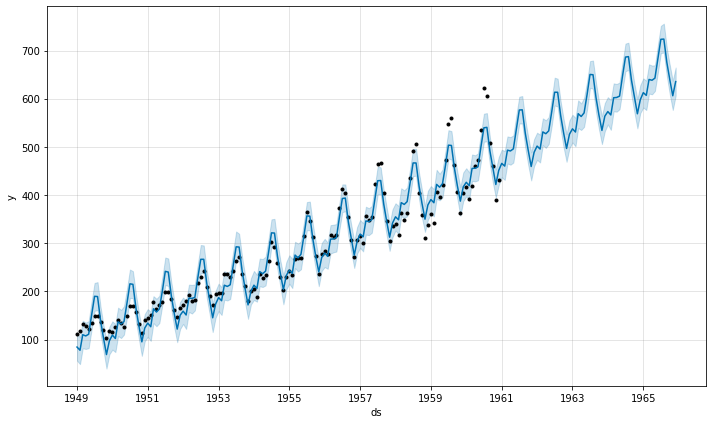

In [18]:
fig1 = m.plot(forecast)

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
Esta serie de tiempo tiene un ciclo anual claro.<BR>
La estacionalidad no es un factor aditivo constante, sino que crece con la tendencia<BR>
Esto se llama Estacionalidad Multiplicativa.    
</strong></p> 

In [19]:
modelEstMult = Prophet(seasonality_mode='multiplicative',
                       weekly_seasonality=True,
                       daily_seasonality=True) 

In [20]:
modelEstMult.fit(df);

In [21]:
futureEstMult = modelEstMult.make_future_dataframe(periods=12 * 5,
                                                   freq='MS')

In [22]:
forecastEstMult = modelEstMult.predict(futureEstMult)

<IPython.core.display.Javascript object>

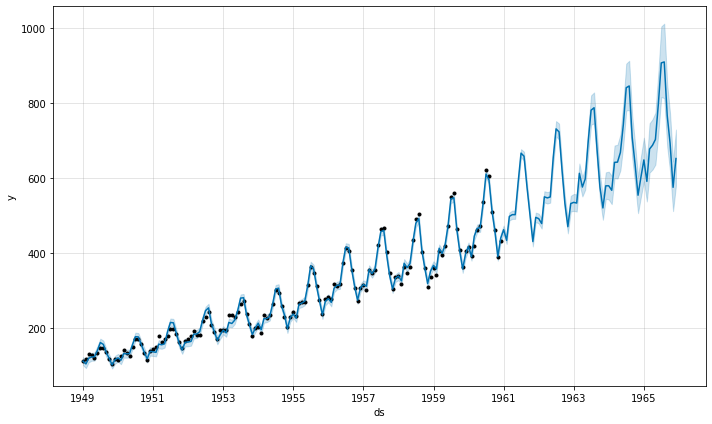

In [23]:
fig = modelEstMult.plot(forecastEstMult)
plt.show()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
Se puede observar como la tendencia es mejor representada por la serie.    
</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Tendencias y Estacionalidad</strong></p> 

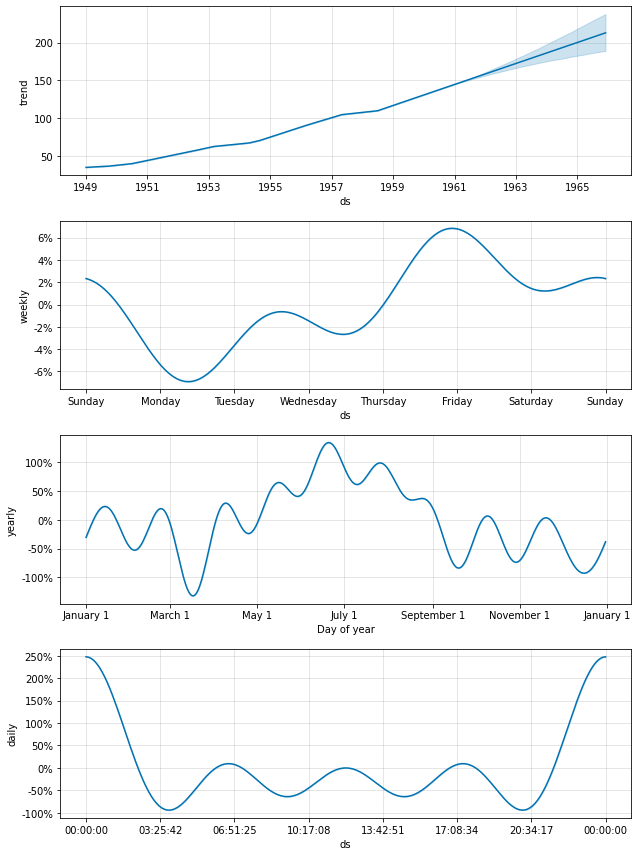

In [26]:
fig2 = modelEstMult.plot_components(forecastEstMult) 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
Con <strong>seasonality_mode = 'multiplicative'</strong>, los efectos de vacaciones también se modelarán como multiplicativos.<BR>
Cualquier <strong>estacionalidad</strong> agregada o regresor adicional usará por defecto el <strong>estacionalidad_mode</strong>.<BR>
</p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Cambio de Tendencia</strong></p> 

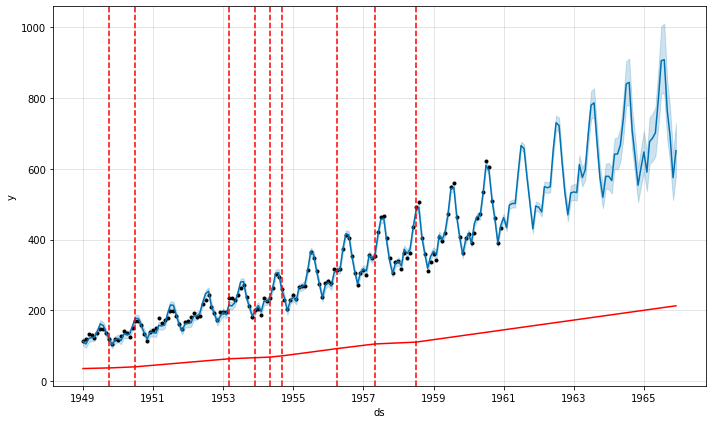

In [27]:
fig = modelEstMult.plot(forecastEstMult) 
a = add_changepoints_to_plot(fig.gca(), modelEstMult, forecastEstMult)

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://programmerclick.com/article/47711488583/" target=\"_blank\">Ejemplo adaptado para el curso de Pronóstico de series de tiempo en Python con Prophet</a>
</strong></p>

In [28]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [29]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [30]:
import pandas as pd
from fbprophet import Prophet

In [31]:
pred = pd.read_csv("./data/covid_19_data.csv")

In [32]:
pred.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [33]:
predgrp = pred.groupby("ObservationDate")[["Confirmed","Recovered","Deaths"]].sum().reset_index()

In [34]:
predgrp.head()

,ObservationDate,Confirmed,Recovered,Deaths
0,01/01/2021,84092619.0,47313005.0,1834675.0
1,01/02/2021,84718978.0,47614297.0,1843108.0
2,01/03/2021,85251774.0,47882779.0,1850449.0
3,01/04/2021,85805892.0,48173187.0,1860598.0
4,01/05/2021,86546014.0,48488548.0,1875953.0


In [35]:
pred_cnfrm = pred.loc[:,["ObservationDate","Confirmed"]]

In [36]:
pred_cnfrm.head()

,ObservationDate,Confirmed
0,01/22/2020,1.0
1,01/22/2020,14.0
2,01/22/2020,6.0
3,01/22/2020,1.0
4,01/22/2020,0.0


In [37]:
pr_data = pred_cnfrm
pr_data.columns = ['ds','y']
pr_data.head()

,ds,y
0,01/22/2020,1.0
1,01/22/2020,14.0
2,01/22/2020,6.0
3,01/22/2020,1.0
4,01/22/2020,0.0


In [38]:
m=Prophet()

In [39]:
m.fit(pr_data);

In [40]:
future=m.make_future_dataframe(periods=15)   # Predicción 15 días

In [41]:
forecast=m.predict(future)

In [42]:
forecast.head().T

,0,1,2,3,4
ds,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00
trend,-2326.239565,-2224.809075,-2123.378585,-2021.948096,-1920.517606
yhat_lower,-338827.711223,-348010.044293,-348260.484427,-338146.432011,-349133.314048
yhat_upper,331673.767077,333319.556319,339871.5493,316688.731111,327473.576902
trend_lower,-2326.239565,-2224.809075,-2123.378585,-2021.948096,-1920.517606
trend_upper,-2326.239565,-2224.809075,-2123.378585,-2021.948096,-1920.517606
additive_terms,-14.143418,15.283468,66.945628,68.017721,7.793773
additive_terms_lower,-14.143418,15.283468,66.945628,68.017721,7.793773
additive_terms_upper,-14.143418,15.283468,66.945628,68.017721,7.793773
weekly,-14.143418,15.283468,66.945628,68.017721,7.793773


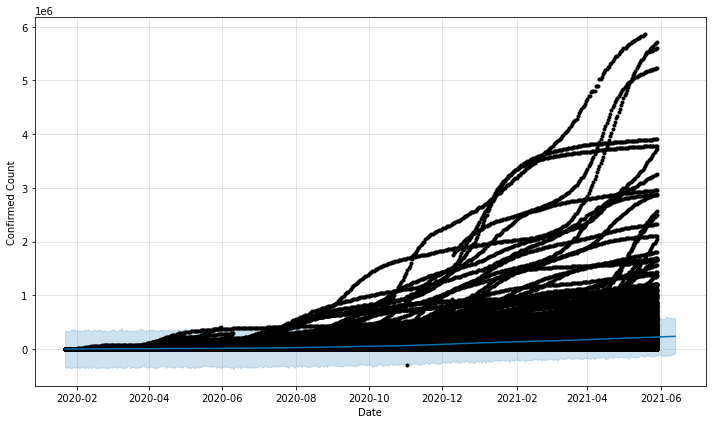

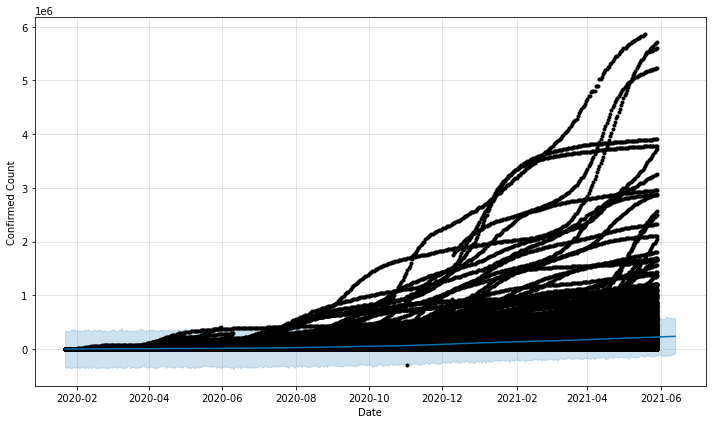

In [43]:
m.plot(forecast,xlabel='Date',ylabel='Confirmed Count', uncertainty=True)

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Tendencias y Estacionalidad</strong></p> 

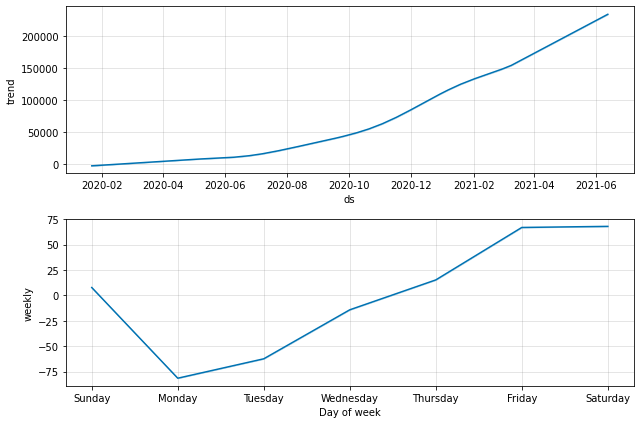

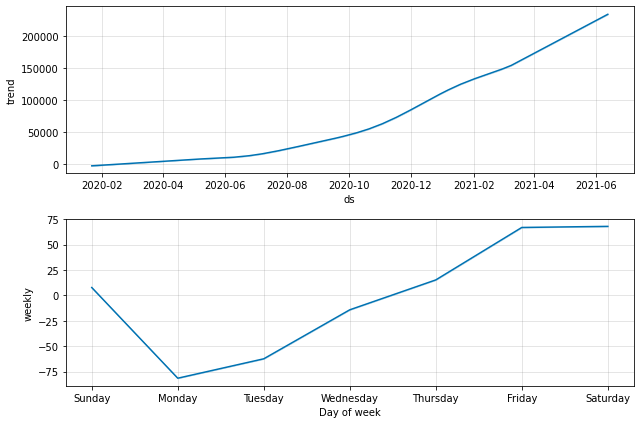

In [44]:
m.plot_components(forecast)

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Salto en los Datos</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://www.packtpub.com/product/forecasting-time-series-data-with-facebook-prophet/9781800568532/" target=\"_blank\">Forecasting-Time-Series-Data-with-Facebook-Prophet</a>
</strong></p>

In [45]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [46]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [47]:
df = pd.read_csv('./data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [48]:
df.head()

,ds,y
0,2014-01-01 01:00:00,1
1,2014-01-01 02:00:00,9
2,2014-01-01 03:00:00,4
3,2014-01-01 04:00:00,1
4,2014-01-01 07:00:00,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

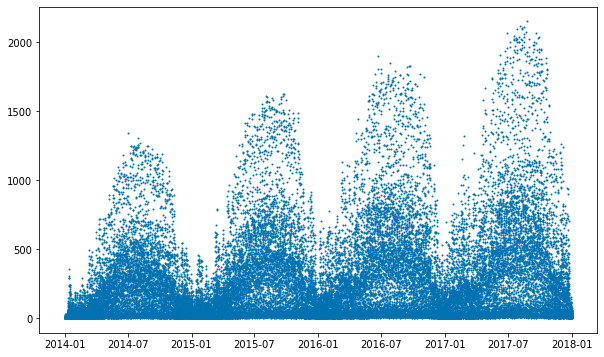

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

In [50]:
model = Prophet(seasonality_mode='multiplicative')

In [51]:
model.fit(df);

In [73]:
future = model.make_future_dataframe(periods=365 * 24, freq='h')

In [76]:
forecast = model.predict(future)

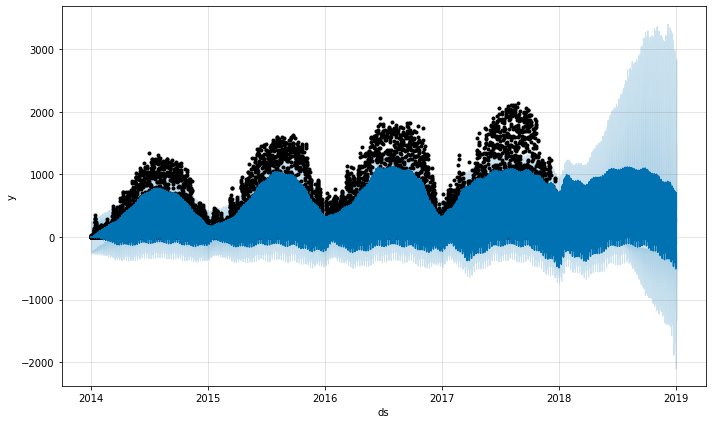

In [77]:
fig = model.plot(forecast)

In [78]:
plt.show()

<IPython.core.display.Javascript object>

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>La predicción tiene una cantidad alta incertidumbre.</strong></p> 

<IPython.core.display.Javascript object>

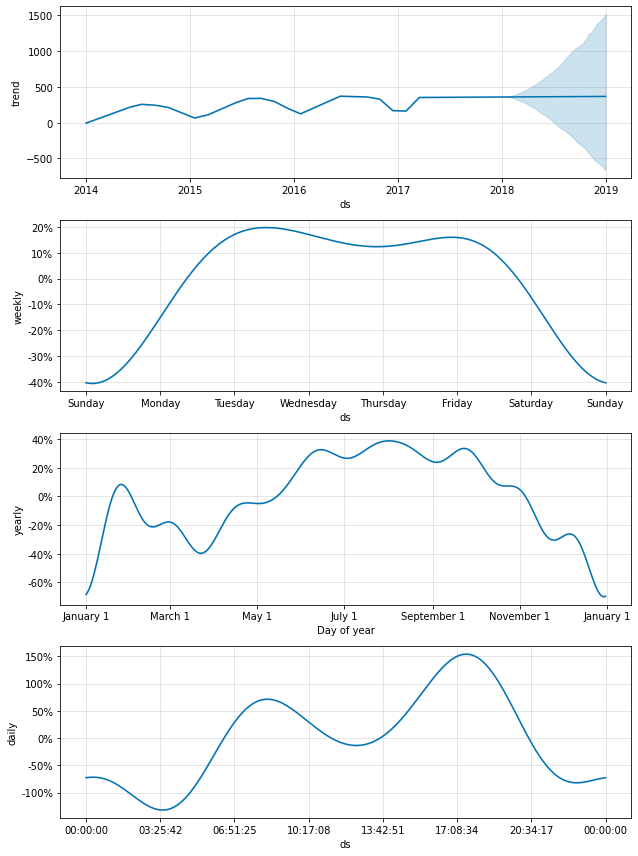

In [82]:
fig2 = model.plot_components(forecast)
plt.show()

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Los datos contienen algunas estacionalidades muy complejas que Prophet no puede modelar completamente.</strong></p>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Existe una estacionalidad diaria dentro de la estacionalidad del año. Es estacionalidad dentro de la estacionalidad.</strong></p>

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Manejo de Datos Faltantes.</strong></p>

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
Prophet es robusto en el manejo de <strong>valores perdidos</strong>.<BR>
Sin embargo, cuando esos datos faltantes ocurren a intervalos regulares, Prophet no tendrá ningún dato de entrenamiento durante esos intervalos para hacer estimaciones.<BR>
La <strong>estacionalidad estará restringida durante los períodos</strong> en los que existan datos, pero sin restricciones durante las brechas, y las predicciones de Prophet pueden ver fluctuaciones mucho mayores que los datos reales mostrados.
</p>

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
La solución es <strong>modificar</strong> el DataFrame para <strong>excluir aquellos momentos en los que nuestros datos de entrenamiento tenían vacíos</strong>.<BR>
</p>


In [53]:
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour < 18)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

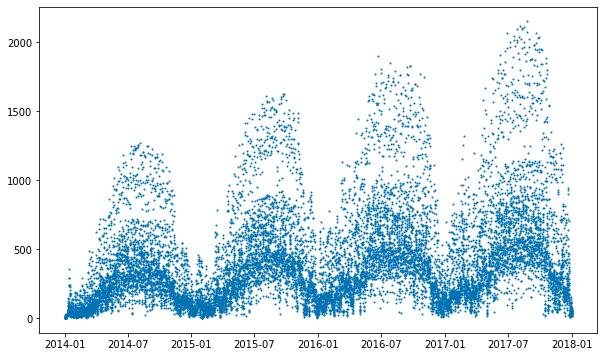

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

In [55]:
model = Prophet(seasonality_mode='multiplicative')

In [56]:
model.fit(df);

In [58]:
future = model.make_future_dataframe(periods=365 * 24, freq='h')

In [59]:
forecast = model.predict(future)

<IPython.core.display.Javascript object>

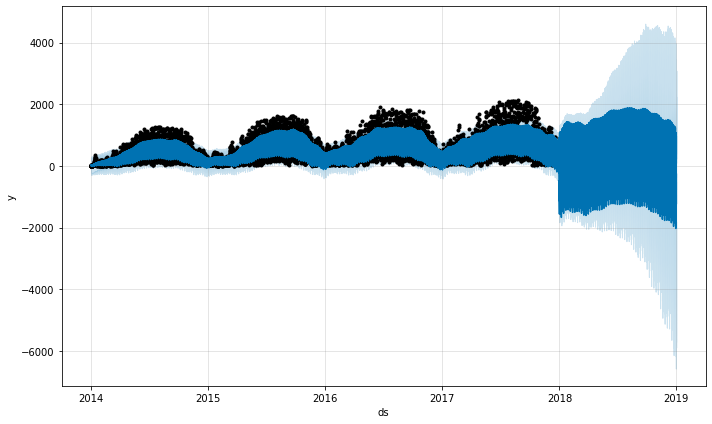

In [60]:
fig = model.plot(forecast)
plt.show();

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Lo que se esta viendo son estimaciones ilimitadas en el período futuro que provocan amplias fluctuaciones en las predicciones.</strong></p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

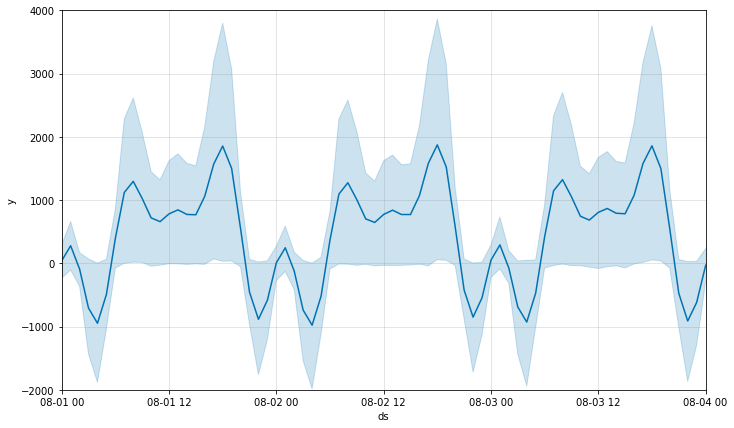

In [90]:
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show();

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>La solución a este problema es simplemente modificar el DataFrame futuro para excluir aquellos momentos en los que nuestros datos de entrenamiento tenían vacíos regulares.</strong></p>

In [91]:
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]

In [92]:
forecast2 = model.predict(future2)

<IPython.core.display.Javascript object>

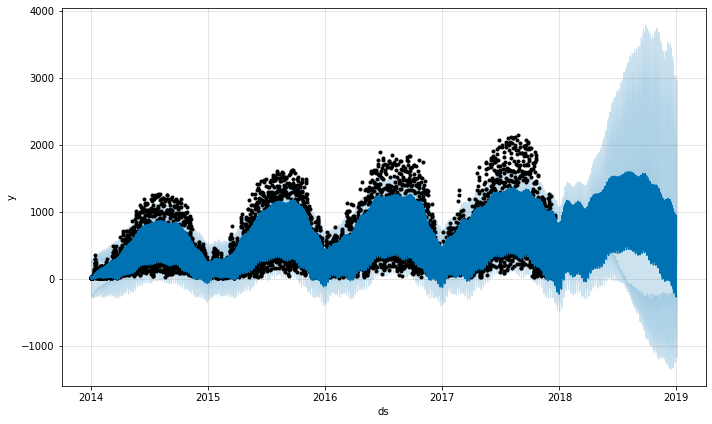

In [93]:
fig = model.plot(forecast2)
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

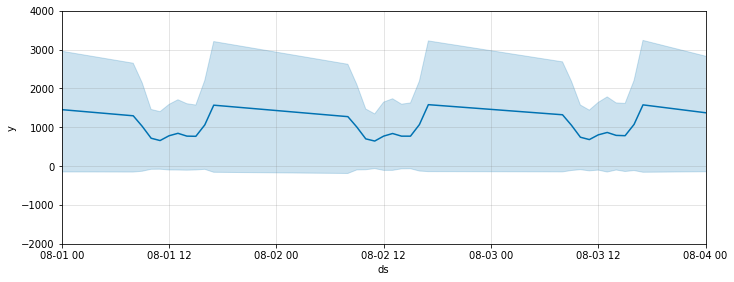

In [94]:
fig = model.plot(forecast2, figsize=(10, 4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show();

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Lo que se ve es la misma curva que antes para las horas entre las 8 am y las 6 pm, pero esta vez Prophet simplemente las conecta con una línea recta.<BR><BR>
De hecho, no hay datos en nuestro DataFrame de pronóstico para estos períodos de tiempo.</strong><BR><BR>
<strong>Prophet es un modelo de tiempo continuo, por lo que aunque el DataFrame de pronóstico ignora esos tiempos excluidos, las ecuaciones que sustentan el modelo se definen continuamente.</strong><BR><BR>

In [95]:
from fbprophet.plot import plot_seasonality

<IPython.core.display.Javascript object>

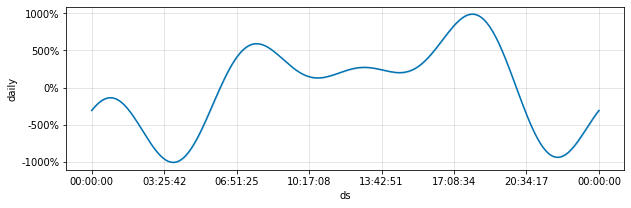

In [96]:
plot_seasonality(model, 'daily', figsize=(10, 3))
plt.show();

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Manejo de Fiestas y Fechas especiales</strong></p> 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv('./data/divvy_hourly.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [66]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                daily_seasonality=True)

In [67]:
model.add_country_holidays(country_name='US');

In [68]:
model.fit(df);

In [69]:
future = model.make_future_dataframe(periods=365)

In [70]:
forecast = model.predict(future)

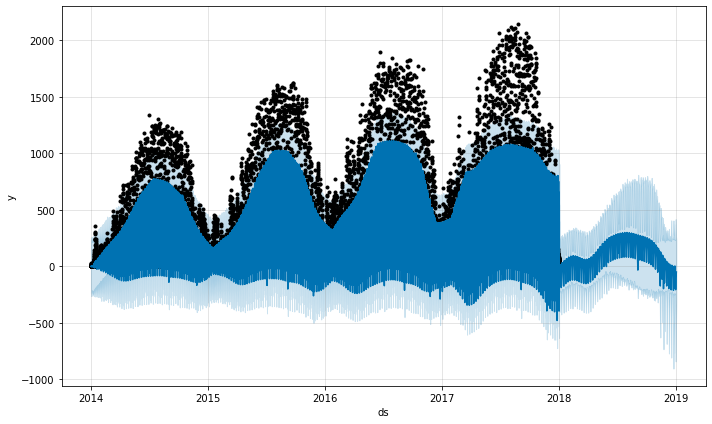

In [71]:
fig = model.plot(forecast)
plt.show()

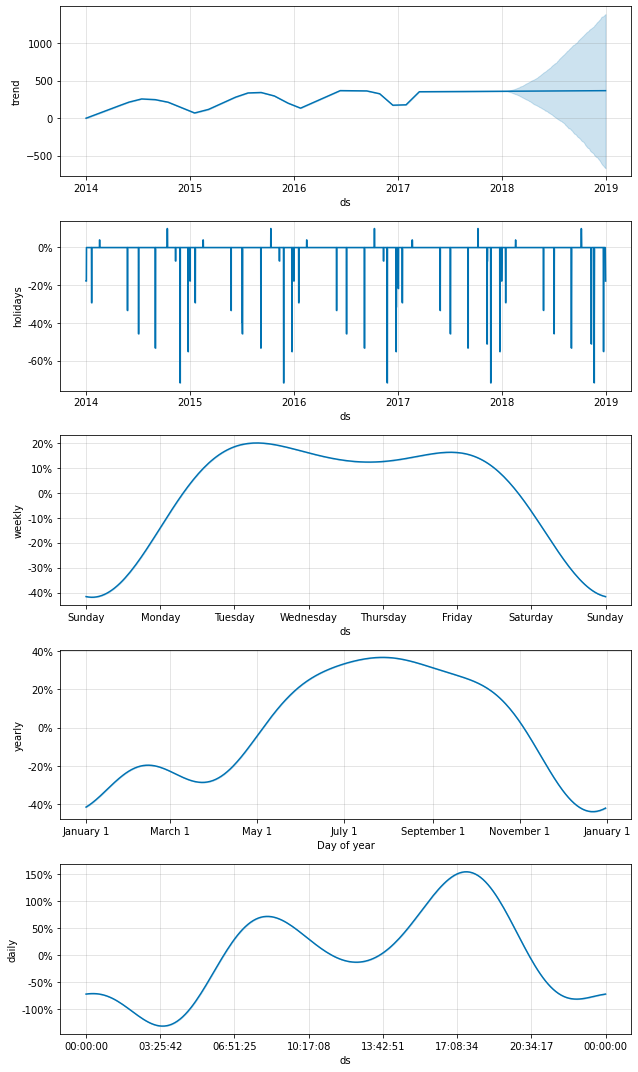

In [72]:
fig2 = model.plot_components(forecast)
plt.show()

In [73]:
model.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [74]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.177866
1,Martin Luther King Jr. Day,-0.292639
2,Washington's Birthday,0.040224
3,Memorial Day,-0.333636
4,Independence Day,-0.457369
5,Labor Day,-0.533212
6,Columbus Day,0.100512
7,Veterans Day,-0.071339
8,Thanksgiving,-0.717374
9,Christmas Day,-0.551631


In [75]:
from fbprophet.make_holidays import make_holidays_df

In [91]:
df.sample(10)

,ds,y
22068,2016-07-21 19:00:00,942
22580,2016-08-12 03:00:00,19
31882,2017-09-04 10:00:00,422
18779,2016-03-06 18:00:00,278
5863,2014-09-11 09:00:00,641
32618,2017-10-05 02:00:00,19
23321,2016-09-12 00:00:00,59
11770,2015-05-18 16:00:00,597
8527,2015-01-01 14:00:00,64
12341,2015-06-11 11:00:00,283


In [92]:
year_list = df['ds'].dt.year.unique().tolist()

In [93]:
year_list

[2014, 2015, 2016, 2017, 2018]

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Se agrega un año.</strong></p>

In [94]:
year_list.append(year_list[-1] + 1)

In [95]:
year_list

[2014, 2015, 2016, 2017, 2018, 2019]

In [98]:
holidays = make_holidays_df(year_list=year_list, country='US') # Cambiar a country='AR'

In [99]:
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-15,Washington's Birthday
3,2016-05-30,Memorial Day
4,2016-07-04,Independence Day
...,...,...
60,2015-09-07,Labor Day
61,2015-10-12,Columbus Day
62,2015-11-11,Veterans Day
63,2015-11-26,Thanksgiving


In [100]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23'])})

In [101]:
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24'])})

In [102]:
holidays = pd.concat([holidays, black_friday, christmas_eve]
                    ).sort_values('ds').reset_index(drop=True)

In [103]:
holidays

,ds,holiday
0,2014-01-01,New Year's Day
1,2014-01-20,Martin Luther King Jr. Day
2,2014-02-17,Washington's Birthday
3,2014-05-26,Memorial Day
4,2014-07-04,Independence Day
...,...,...
70,2019-09-02,Labor Day
71,2019-10-14,Columbus Day
72,2019-11-11,Veterans Day
73,2019-11-28,Thanksgiving


In [113]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays,
                holidays_prior_scale=10,
                daily_seasonality=True)

In [114]:
model.fit(df);

In [118]:
future = model.make_future_dataframe(periods=0)

In [119]:
forecast = model.predict(future)

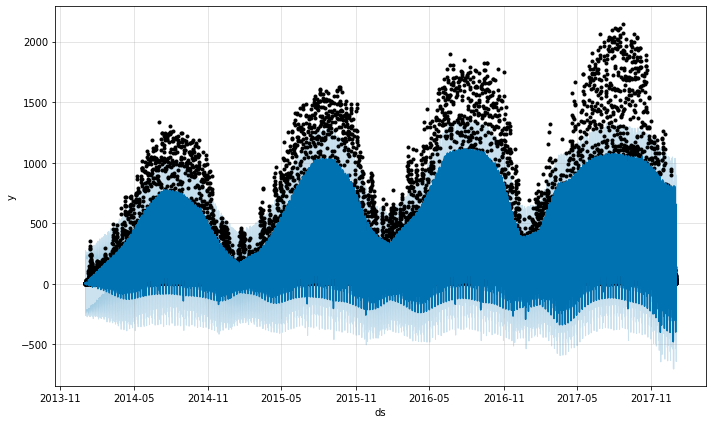

In [120]:
fig = model.plot(forecast)
plt.show()

In [121]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.175978
1,Martin Luther King Jr. Day,-0.292446
2,Washington's Birthday,0.035081
3,Memorial Day,-0.336250
4,Independence Day,-0.456325
5,Labor Day,-0.524459
6,Columbus Day,0.105072
7,Veterans Day,-0.084732
8,Thanksgiving,-0.745124
9,Black Friday,-0.515057


<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 